# Basics of classification on the *Abalone* dataset

First, let's import some packages. In particular, we will need `numpy` and `pandas` for processing the data, `pyplot` for making plots, and the implementations of the classification algorithms and basic evaluation metrics from `sklearn` (a.k.a. 'scikit-learn').

See the documentation:

   - numpy (https://numpy.org/doc/stable/)
   - pandas (https://pandas.pydata.org/pandas-docs/stable/index.html)
   - matplotlib.pyplot (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)
   - sklearn.tree (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree)
   - sklearn.svm (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm)
   - sklearn.metrics (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

In [1]:
%matplotlib inline
import numpy
import pandas
import matplotlib.pyplot as plt
from sklearn import tree, svm, metrics

For repeatability, set the seed of the seudo-random number generator to some large integer of your choice. In particular, I set the value of `SEED` in the first line below to my student number.

In [2]:
SEED = 2208497
RS = numpy.random.RandomState(numpy.random.MT19937(numpy.random.SeedSequence(SEED)))

## Loading and preparing the data

[Abalone](https://archive.ics.uci.edu/ml/datasets/Abalone) is one of the popular datasets from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php).

The dataset contains physical measurements of abalones, i.e. marine gastropod molluscs (see https://en.wikipedia.org/wiki/Abalone).

In particular, from the [dataset description](https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.names) we can find the list of attributes:

Name | Data Type | Meas. | Description | 
---- | -----| ---- | ----------- |
Sex	 | nominal |   | M, F, and I (infant) |
Length | continuous | mm | Longest shell measurement |
Diameter | continuous | mm | perpendicular to length
Height | continuous | mm | with meat in shell |
Whole weight | continuous | grams | whole abalone |
Shucked weight | continuous | grams | weight of meat |
Viscera weight | continuous | grams | gut weight (after bleeding) |
Shell weight | continuous | grams | after being dried |
Rings | integer |  | +1.5 gives the age in years |

The classification task we consider here is to predict the gender ('M' = Male, 'F' = Female, 'I' = Infant) of an abalone based on its physical measurements.


When we first started doing this analysis, we realized that the results and plots get very difficult to understand, when we use the entire abalone dataset for this classification task. To be able to see the individual datapoints more clearly, we decided to just import and use a subset of this dataset in this analysis. In particular, we created a new abalone.data file, where we inserted only the first 250 entries in the abalone dataset. This improved the issue by a lot.

In [3]:
cnames = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']
dtf = pandas.read_csv('abalone_first250.data', sep=',', names=cnames) # LOCALLY
# dtf = pandas.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', sep=',', names=cnames) # REMOTELY
dtf

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
...,...,...,...,...,...,...,...,...,...
245,I,0.350,0.260,0.085,0.1740,0.0705,0.0345,0.060,10
246,I,0.320,0.245,0.080,0.1585,0.0635,0.0325,0.050,13
247,I,0.360,0.275,0.085,0.1975,0.0745,0.0415,0.070,9
248,I,0.305,0.245,0.075,0.1560,0.0675,0.0380,0.045,7


We define three colors for plotting the different classes of genders of the abalones.

In [4]:
class_colors = ['#DDAA33', '#BB5566', '#004488']

We separate the predictive attributes from the class attribute, putting them in numpy arrays.

In [5]:
natts = len(cnames)-1
#print("natts: ",natts)
X = numpy.vstack([dtf[c] for c in cnames[1:]]).T
#print("X: ", X, "Length X: ", len(X))
y = numpy.array(dtf[cnames[0]].rank(method='dense', ascending=True).astype(int)-1)
#print("Y: ", y, "Length y: ", len(y))
classes = sorted(set(dtf[cnames[0]]))
classes

['F', 'I', 'M']

Now we are ready to plot the data, showing scatter plots of all pairs of predictive attributes. 
Each dot represents the gender of an abalone with the color indicating which gender it has. Some genders have the same values for the attributes and hence the dots overlap strongly.

(4.0, -2.0)

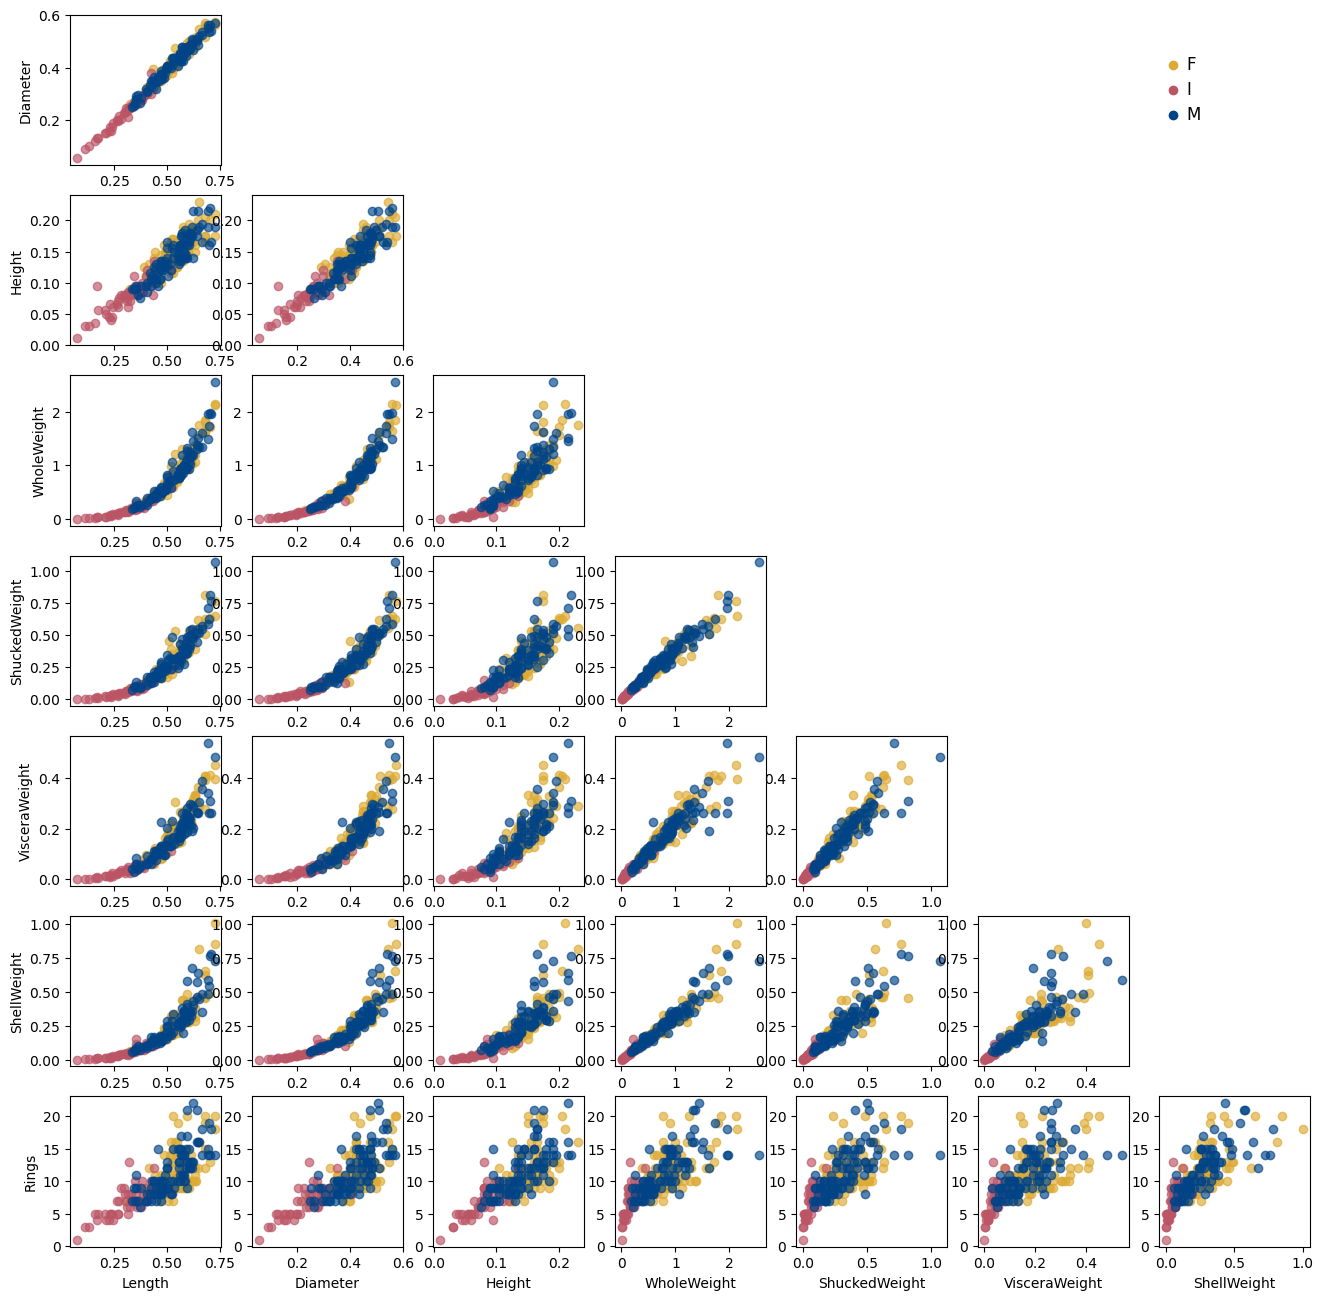

In [6]:
fig, axes = plt.subplots(natts-1, natts-1, figsize=(16,16))
for xi, xname in enumerate(cnames[1:]):
    if xi > 0:
        axes[xi-1, 0].set_ylabel(xname)
    if xi < natts-1:
        axes[natts-2, xi].set_xlabel(xname)
    
    for yi, yname in enumerate(cnames[:xi]):
        for ci, cc in enumerate(classes):
            axes[xi-1, yi].plot(X[y==ci,yi], X[y==ci,xi], 'o', color=class_colors[ci], alpha=0.66)    
        if yi != xi-1:
            axes[yi, xi-1].axis('off')

for ci, cc in enumerate(classes):
    axes[0, -1].scatter([0], [ci], color=class_colors[ci], cmap='Accent', vmin=0, vmax=3)
    axes[0, -1].text(0.1, ci, cc, verticalalignment='center', fontsize=12)
axes[0, -1].set_xlim([-.1,1])
axes[0, -1].set_ylim([len(classes)+1,-2])
# plt.show()


As we mentioned already at the description of the dataset, we had the problem of extremly overlapping data points when we ran this anaylsis  on the entire abalone dataset (instead of, as we have done it now, on a fraction of the original dataset). However, as you can clearly see from the above plots, it is still quite hard to distinguish the individual data pints. The main reason for this is that we use a lot more attributes than the iris classification notebook uses, which means the plots are a lot smaller and thus, individual data points are not easy to spot. However, the benefit of making this visualization is not necessarily that we can see all data points perfectly, but rather, that we can see some trends in the dataset and custom our analysis to it. Therefore, the result is fine for our needs.

We see the following trends in the above plot:
- The red data points ('I') and the yellow data points ('F') seem to be more easily separable from each other than the blue data points ('M') from any of the two other genders. The possibilty of 'I' and 'F' being linearly separable from each other thus seems to be high, but of course we still need to verify this hypothesis (it might also be, that we just can't see all points as blue might be overlying a lot of the 'F' and 'I' data points).
- The yellow data points ('F') and blue data points ('M') seem to be very similar, with many overlapping data points.
- Infant abalones (Gender: 'I') have the smallest values for all attributes, which makes sense as they are still growing. By contrast, both male and female abalones have many overlapping data points, even in the highest values of all attributes. This means that male and female abalones have similar size, number of rings and weight.

These observations give us some idea on which results we should expect in our following classifications..

## Binary classification 'F' vs. 'M' using a decision tree

We start with the simplest binary classification task, telling 'F' (class label 0, `y==0`) from M' (class label 2, `y==2`), using a decision trees. From the observations made above, we expect that it is very hard to distinguish both genders from each other, but let's see if we are correct:

First we prepare the data, splitting it into training and test subsets (in proportion 80%-20%).
We show the class labels of the test instances.

In [7]:
ratio_test = 0.2
idsC0 = numpy.random.permutation(numpy.where(y == 0)[0])
idsC2 = numpy.random.permutation(numpy.where(y == 2)[0])
nbC0_test = int(ratio_test * len(idsC0))
nbC2_test = int(ratio_test * len(idsC2))
ids02_test = numpy.concatenate((idsC0[:nbC0_test], idsC2[:nbC2_test]))
ids02_train = numpy.concatenate((idsC0[nbC0_test:], idsC2[nbC2_test:]))
X02_train = X[ids02_train, :]
y02_train = y[ids02_train]
X02_test = X[ids02_test, :]
y02_test = y[ids02_test]
y02_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

We setup a [decision tree classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) with default parameters, fit it on the training subset, and generate the predictions for the test subset.

In [8]:
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X02_train, y02_train)
y02_pred_dt = dt.predict(X02_test)
y02_pred_dt

array([0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2])

We compute the accuracy of the classifier on this task, i.e. the ratio of predicted class labels that match the ground truth. 

An accuracy of ~0.5 indicates that the classification algorithm is producing wrong classifications of the test data points 50% of the time. In theory, 50% accuracy is the worst possible accuracy for a binary classifier, as 50% equals guessing, when we only have 2 options. In practice, as we can see here, the accuracy can be even worse, just like we can make a lot of unlucky guesses

-> For example, if you run the last few cells for a few times, you will notice that the accuracy usually changes between 0.47 and 0.52. So it is less than 50% most of the time. 

This result is no surprise, as we already saw above, that male and female abalones have extremly similar attribute values.

In [9]:
metrics.accuracy_score(y02_test, y02_pred_dt)

0.5

We compute the precision, considering 'M' as the positive class (`pos_label=2`). Like the accuracy, the precision isn't really high.

In [10]:
metrics.precision_score(y02_test, y02_pred_dt, pos_label=2)

0.47368421052631576

And the recall, again considering 'M' as the positive class (`pos_label=2`). Once again, we are far away from an optimal recall value.

In [11]:
metrics.recall_score(y02_test, y02_pred_dt, pos_label=2)

0.5

Next, we show a diagram of the learned decision tree.

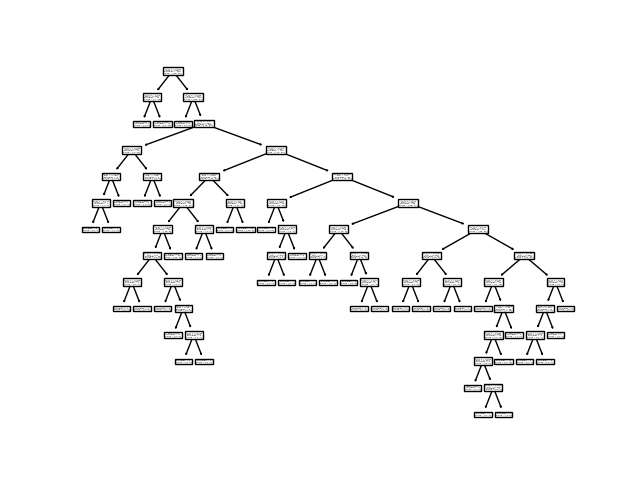

<Figure size 640x480 with 0 Axes>

In [12]:
tree.plot_tree(dt)
plt.show()

We need a very complex tree to tell apart male and female abalones and as we saw from the above metrics, even this is not sufficient. They are just too similar.


In summary, we saw that using a decision tree to classify abalones as males or females doesn't make any sense with the given specifications.

## Binary classification 'I' vs. 'M' using a decision tree

Next, we try another binary classification task, telling 'I' (class label 1, `y==1`) from 'M' (class label 2, `y==2`), using a decision tree.

We prepare the data, splitting it into training and test subsets (in proportion 80%-20%).
We show the class labels of the test instances.

In [13]:
ratio_test = 0.2
idsC1 = numpy.random.permutation(numpy.where(y == 1)[0])
idsC2 = numpy.random.permutation(numpy.where(y == 2)[0])
nbC1_test = int(ratio_test * len(idsC1))
nbC2_test = int(ratio_test * len(idsC2))
ids12_test = numpy.concatenate((idsC1[:nbC1_test], idsC2[:nbC2_test]))
ids12_train = numpy.concatenate((idsC1[nbC1_test:], idsC2[nbC2_test:]))
X12_train = X[ids12_train, :]
y12_train = y[ids12_train]
X12_test = X[ids12_test, :]
y12_test = y[ids12_test]
y12_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

We setup a decision tree classifier, with default parameters, fit it on the training subset, and generate the predictions for the test subset.

In [14]:
dtA = tree.DecisionTreeClassifier()
dtA = dtA.fit(X12_train, y12_train)
y12_pred_dtA = dtA.predict(X12_test)
y12_pred_dtA

array([1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2])

We compute the accuracy of the classifier on this task. The accuracy of this binary classifier is good and shows us, that it makes sense to use a binary classifier to classify abalones as male or infants given the respective set of attribute values. However, there is still a lot of room for improvement. This accuracy might be alright for non-critical tasks, but it would be a disaster for critical tasks.

In [15]:
metrics.accuracy_score(y12_test, y12_pred_dtA)

0.7142857142857143

We compute the precision, considering 'M' as the positive class (`pos_label=2`). Precision quantifies the number of positive class predictions 'M' that actually belong to the positive class 'M'. 81% of the 'M' predictions of the binary classifier were thus correct, which is a good rating, but not perfect. 

In [16]:
metrics.precision_score(y12_test, y12_pred_dtA, pos_label=2)

0.8125

And the recall, again considering 'M' as the positive class (`pos_label=2`). Recall quantifies the number of positive class predictions 'M' made out of all positive examples 'M' in the dataset. The binary classifier identified 72% of all male abalone correctly.

In [17]:
metrics.recall_score(y12_test, y12_pred_dtA, pos_label=2)

0.7222222222222222

We show a diagram of the learnt decision tree.

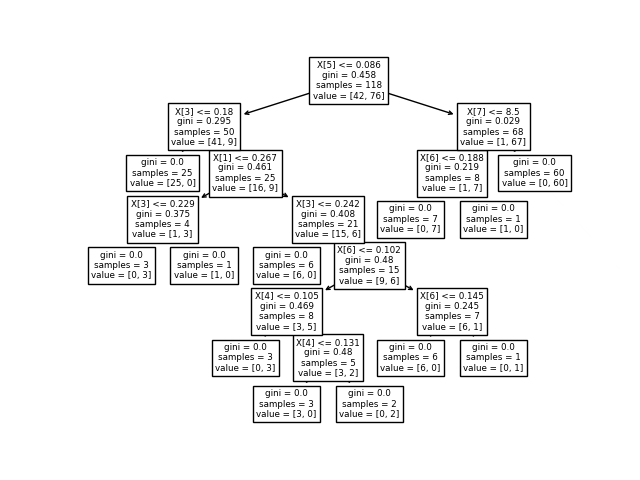

<Figure size 640x480 with 0 Axes>

In [18]:
tree.plot_tree(dtA)
plt.show()

This decision tree looks a lot better than the first one. But still, it is quite complex.

In total, we can say that using a decision tree for performing binary classification of male and infant abalones is suitable and produces good results. The analysis also shows us that both "genders" can be separated quite nicely from each other. The decision tree itself, however, is still quite complex. 

# Binary classification 'I' vs. 'F' using decision trees

Next, we try another binary classification task, telling 'I' (class label 1, `y==1`) from 'F' (class label 0, `y==0`), using decision trees.

We prepare the data, splitting it into training and test subsets (in proportion 80%-20%). We show the class labels of the test instances.

In [19]:
ratio_test = 0.2
idsC1 = numpy.random.permutation(numpy.where(y == 1)[0])
idsC2 = numpy.random.permutation(numpy.where(y == 0)[0])
nbC1_test = int(ratio_test * len(idsC1))
nbC2_test = int(ratio_test * len(idsC2))
ids12_test = numpy.concatenate((idsC1[:nbC1_test], idsC2[:nbC2_test]))
ids12_train = numpy.concatenate((idsC1[nbC1_test:], idsC2[nbC2_test:]))
X12_train = X[ids12_train, :]
y12_train = y[ids12_train]
X12_test = X[ids12_test, :]
y12_test = y[ids12_test]
y12_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

We setup a decision tree classifier, with default parameters, fit it on the training subset, and generate the predictions for the test subset.

In [20]:
dtA = tree.DecisionTreeClassifier()
dtA = dtA.fit(X12_train, y12_train)
y12_pred_dtA = dtA.predict(X12_test)
y12_pred_dtA

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

We compute the accuracy of the classifier on this task. We have a higher accuracy as we had before when we used the decision tree to classify infants and males. Again, this is a good accuracy and doesn't come as a surprise after our analysis about the dataset above. Of course, it is still not perfect.

In [21]:
metrics.accuracy_score(y12_test, y12_pred_dtA)

0.8333333333333334

We compute the precision, considering 'F' as the positive class (pos_label=0). Precision quantifies the number of positive class predictions 'F' that actually belong to the positive class 'F'. Here, we have a prediction score of 82%, which is good.

In [22]:
metrics.precision_score(y12_test, y12_pred_dtA, pos_label=0)

0.8260869565217391

And the recall, again considering 'F' as the positive class (pos_label=0). Recall quantifies the number of positive class predictions 'F' made out of all positive examples 'F' in the dataset. The binary classifier identified 95% of all female abalones correctly.

In their Machine Learning Crash Course, Google writes the following about precision and recall:

*"Unfortunately, precision and recall are often in tension. That is, improving precision typically reduces recall and vice versa."*

Source: https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall

This is exactly what we can see in this decision tree and the one before. One of both scores always evaluates the particular algorithm as better performing than the other score does. This is an interesting and important finding. It shows us that we need to investigate both values, precision and recall to be able to fully evaluate the effectiveness of our model. Otherwise, we risk choosing a suboptimal algorithm for a given classification task.

In [23]:
metrics.recall_score(y12_test, y12_pred_dtA, pos_label=0)

0.95

We show a diagram of the learnt decision tree.

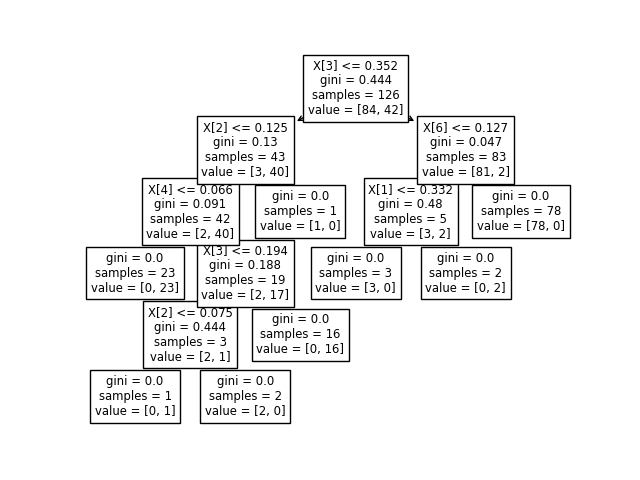

<Figure size 640x480 with 0 Axes>

In [24]:
tree.plot_tree(dtA)
plt.show()

Next, we train another decision tree for the same task, with the same train/test split, but using entropy as the split criterion instead of the default gini (`criterion`). Entropy measures the impurity or uncertainty in a group of observations and thus determines how a decision tree chooses to split data.

In [25]:
dtB = tree.DecisionTreeClassifier(criterion='entropy')
dtB = dtB.fit(X12_train, y12_train)
y12_pred_dtB = dtB.predict(X12_test)
y12_pred_dtB

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

We compute the accuracy of the classifier on this task. The accuracy is slightly higher than it was for the same analysis using gini as a split criterion. Although the improvement isn't enormous, it can have a drastic impact long-term, when we use the algorithm to classify the genders of other abalones. Therefore, this is a great finding.

In [26]:
metrics.accuracy_score(y12_test, y12_pred_dtB)

0.8666666666666667

We compute the precision, considering 'F' as the positive class (`pos_label=0`). We get the same recall and a higher precision. This demonstrates once again, that we improved the performance of our algorithm with this change in the split criterion.

In [27]:
metrics.precision_score(y12_test, y12_pred_dtB, pos_label=0)

0.8636363636363636

And the recall, again considering 'F' as the positive class (`pos_label=0`).

In [28]:
metrics.recall_score(y12_test, y12_pred_dtB, pos_label=0)

0.95

We show a diagram of the learnt decision tree. This is almost the same decision tree as the one we saw in the previous analysis, just with a different split criterion. This makes sense given the findings above.

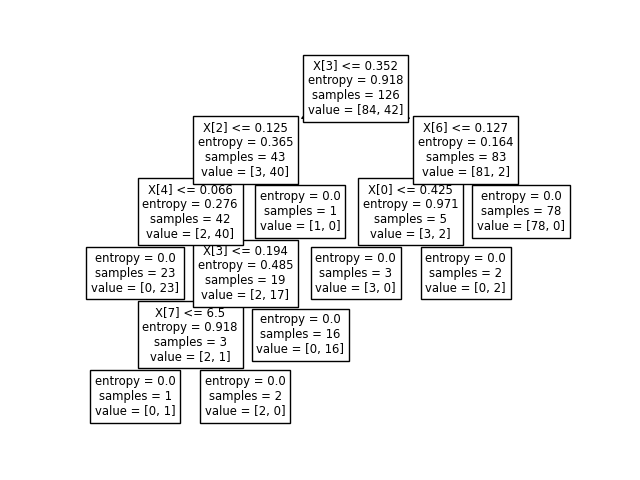

<Figure size 640x480 with 0 Axes>

In [29]:
tree.plot_tree(dtB)
plt.show()

Finally, we train yet another decision tree for the same task, with the same train/test split, again using entropy, but raising the minimum number of samples required to split an internal node (`min_samples_split`) from the default value of 2 to 10. From this step, we expect that our decision tree will become less complex and that the accuracy might improve even more. Let's see, if this turns out to be the case..

In [30]:
dtC = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=10)
dtC = dtC.fit(X12_train, y12_train)
y12_pred_dtC = dtC.predict(X12_test)
y12_pred_dtC

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

Indeed, the accuracy, precision and recall are even better than the ones we had above! Now, our algorithm has a really good performance! This means that changing the minimum number of samples required to split an internal node results in a noticeble performance increase of the decision tree. This change will likely have an effect on the complexity of the tree too..

In [31]:
metrics.accuracy_score(y12_test, y12_pred_dtC)

0.9333333333333333

We compute the precision, considering 'F' as the positive class (`pos_label=0`).

In [32]:
metrics.precision_score(y12_test, y12_pred_dtC, pos_label=0)

0.9090909090909091

And the recall, again considering 'F' as the positive class (`pos_label=0`).

In [33]:
metrics.recall_score(y12_test, y12_pred_dtC, pos_label=0)

1.0

We show a diagram of the learnt decision tree.

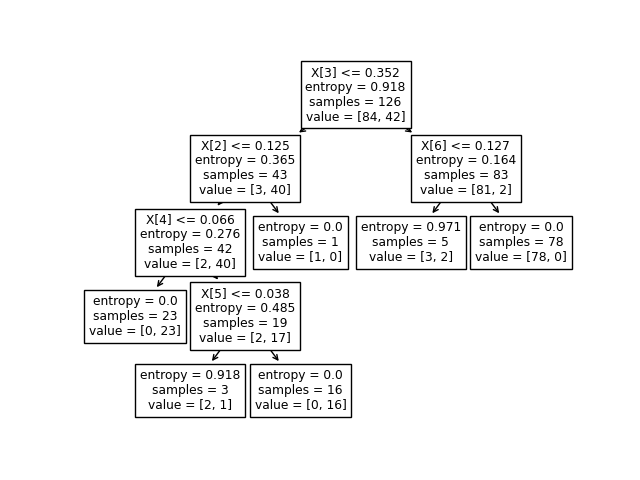

<Figure size 640x480 with 0 Axes>

In [34]:
tree.plot_tree(dtC)
plt.show()

As a consequence of raising `min_samples_split` the complexity of the resulting decision is reduced. The decision tree has one layer less and four internal nodes less. This might help tackle over-fitting a bit. Still, the decision tree is quite complex.

## Ternary classification using a decision tree

Decision trees are able to handle more than two classes, i.e. are not limited to binary classification.
Next, we learn a decision tree to tell the three "genders" apart directly.

We prepare the data, splitting it into training and test subsets (in proportion 80%-20%).
We show the class labels of the test instances.

In [35]:
ratio_test = 0.2
idsC0 = numpy.random.permutation(numpy.where(y == 0)[0])
idsC1 = numpy.random.permutation(numpy.where(y == 1)[0])
idsC2 = numpy.random.permutation(numpy.where(y == 2)[0])
nbC0_test = int(ratio_test * len(idsC0))
nbC1_test = int(ratio_test * len(idsC1))
nbC2_test = int(ratio_test * len(idsC2))
ids012_test = numpy.concatenate((idsC0[:nbC0_test], idsC1[:nbC1_test], idsC2[:nbC2_test]))
ids012_train = numpy.concatenate((idsC0[nbC0_test:], idsC1[nbC1_test:], idsC2[nbC2_test:]))
X012_train = X[ids012_train, :]
y012_train = y[ids012_train]
X012_test = X[ids012_test, :]
y012_test = y[ids012_test]
y012_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2])

We train a decision tree for this ternary task, with the parameters as previously.

In [36]:
dtT = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=10)
dtT = dtT.fit(X012_train, y012_train)
y012_pred_dtT = dtT.predict(X012_test)
y012_pred_dtT

array([0, 2, 2, 1, 0, 2, 1, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2])

We compute the accuracy of the classifier on this task. Again, the decision tree has the same accuracy as it would have if it would guess the gender of an abalone.  It is no surprise that we have a bad accuracy here. We've already seen that it is extremly hard to tell apart male and female abalones from their attribute values. Distinguishing all three "genders" from each other, is therefore no easy task.

In [37]:
metrics.accuracy_score(y012_test, y012_pred_dtT)

0.5

Precision and recall are not really meaningful and useful in the ternary case.

We show a diagram of the learnt decision tree. Note that the distribution in the leaves is over three values, corresponding to the three classes, instead of just two previously.

As the accuracy of this analysis is very bad, it is no surprise that we get an extremly complex decision tree. This demonstrates once again, how difficult it is to separate the genders from each other, when both males and females are included in the classification task.

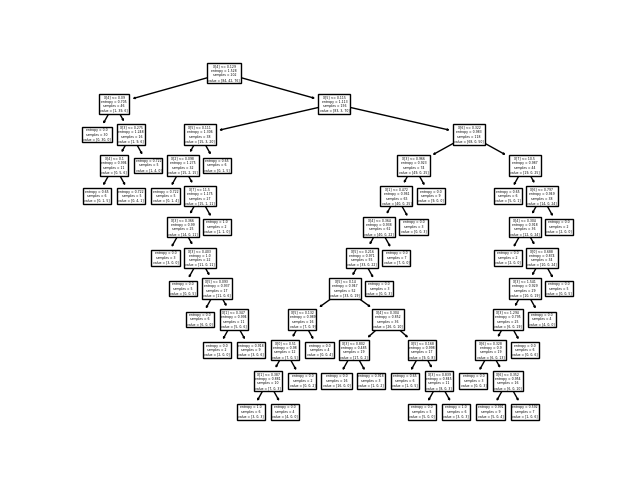

<Figure size 640x480 with 0 Axes>

In [38]:
tree.plot_tree(dtT)
plt.show()

## Binary classification 'M' vs. 'F' using a support vector machine (SVM)

We go back to the first binary classification task, telling 'M' from 'F', this time using a support vector machine. Let's see whether the algorithm is more capable of telling apart both genders than the decision tree was. We use the data split prepared earlier.

We setup a [linear support vector classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) with default parameters, fit it on the training subset, and generate the predictions for the test subset.

In [39]:
sv = svm.LinearSVC()
sv = sv.fit(X02_train, y02_train)
y02_pred_sv = sv.predict(X02_test)
y02_pred_sv

/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0,
       2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0])

We compute the accuracy of the classifier on this task. And quickly, we can see that SVM is not more capable of telling apart both genders than the decision tree was. It has approximately the same performance as the decision tree. Once again, this reinforces our finding that the bad result is not due to the limitations of a certain algorithm but that it is caused by the nature of the dataset. A human looking at the given attribute values of an abalone would probably have the same difficulties of saying whether it is a male or female (without having any other infromation about it or seeing the abalone). Likewise, the precision and recall are both very bad again.

In [40]:
metrics.accuracy_score(y02_test, y02_pred_sv)

0.5263157894736842

We compute the precision, considering 'M' as the positive gender (`pos_label=2`).

In [41]:
metrics.precision_score(y02_test, y02_pred_sv, pos_label=2)

0.5

And the recall, again considering 'M' as the positive gender (`pos_label=2`).

In [42]:
metrics.recall_score(y02_test, y02_pred_sv, pos_label=2)

0.2777777777777778

In summary, we saw that the SVM algorithm isn't better at classifying the abalone dataset than the different variants of the decision tree that we tried.

## Binary classification 'I' vs. 'F' using a support vector machine (SVM)

Next, we apply the same type of SVM to the 'I' vs. 'F' task.

In [43]:
ratio_test = 0.2
idsC1 = numpy.random.permutation(numpy.where(y == 1)[0])
idsC2 = numpy.random.permutation(numpy.where(y == 0)[0])
nbC1_test = int(ratio_test * len(idsC1))
nbC2_test = int(ratio_test * len(idsC2))
ids12_test = numpy.concatenate((idsC1[:nbC1_test], idsC2[:nbC2_test]))
ids12_train = numpy.concatenate((idsC1[nbC1_test:], idsC2[nbC2_test:]))
X12_train = X[ids12_train, :]
y12_train = y[ids12_train]
X12_test = X[ids12_test, :]
y12_test = y[ids12_test]
y12_test

svA = svm.SVC(kernel='linear')
svA = svA.fit(X12_train, y12_train)
y12_pred_svA = svA.predict(X12_test)
y12_pred_svA

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

We compute the accuracy of the classifier on this task.

In [44]:
metrics.accuracy_score(y12_test, y12_pred_svA)

0.8333333333333334

We compute the precision, considering 'F' as the positive class (`pos_label=0`).

In [45]:
metrics.precision_score(y12_test, y12_pred_svA, pos_label=0)

0.8571428571428571

And the recall, again considering 'F' as the positive class (`pos_label=0`).

In [46]:
metrics.recall_score(y12_test, y12_pred_svA, pos_label=0)

0.9

As we can see, SVM is quite good at classifying female versus infant abalones. However, we've already seen with the decision tree, how useful it can be to play around with different parameters. So let's try some modifications:

We try the SVM with a polynomial kernel of degree 3.

In [47]:
svB = svm.SVC(kernel='poly', degree=3)
svB = svB.fit(X12_train, y12_train)
y12_pred_svB = svB.predict(X12_test)
y12_pred_svB

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0])

We compute the accuracy of the classifier on this task. It is better than the accuracy we had before, so this is a good improvement!

In [48]:
metrics.accuracy_score(y12_test, y12_pred_svB)

0.8666666666666667

We compute the precision, considering 'F' as the positive class (`pos_label=0`).

In [49]:
metrics.precision_score(y12_test, y12_pred_svB, pos_label=0)

0.9444444444444444

And the recall, again considering 'F' as the positive class (`pos_label=0`). 

In [50]:
metrics.recall_score(y12_test, y12_pred_svB, pos_label=0)

0.85

Using a kernel SVM is useful when the classes cannot be separated with a simple hyperplane, but resorting to an complex decision boundary can be detrimental and lead to overfitting.

Finally, we train a linear SVM, but in three dimensions rather than all of them, i.e. only on attributes 'diameter', 'height' and 'length'.

In [51]:
svC = svm.SVC(kernel='linear')
svC = svC.fit(X12_train[:,[1,3]], y12_train)
y12_pred_svC = svC.predict(X12_test[:,[1,3]])
y12_pred_svC

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

We compute the accuracy of the classifier on this task. However, this change didn't lead to any significant improvements overall, as we can see from the accuracy, recall and precision. The recall got better, but the precision worse (we described their relationship above in detail). The accuracy is almost the same.

In [52]:
metrics.accuracy_score(y12_test, y12_pred_svC)

0.8666666666666667

We compute the precision, considering 'F' as the positive class (`pos_label=0`).

In [53]:
metrics.precision_score(y12_test, y12_pred_svC, pos_label=0)

0.8636363636363636

And the recall, again considering 'F' as the positive class (`pos_label=0`).

In [54]:
metrics.recall_score(y12_test, y12_pred_svC, pos_label=0)

0.95

# The 4 most important findings in this Python Notebook:

- we need to use both Recall and Precision (alongside the accuracy, of course) to evaluate the performance of an algorithm. Their values can differ as much as 10% (& sometimes even more), so it is really important to compute both values for the evaluation of an algorithm
- The decision tree with the split criterion entropy and 10 as the minimum number of samples required to split an internal node has the best overall performance (looking at all 3 metrics) from all decision trees and SVMs. It is really good at classifying infant and female abalones.
- Playing around with different parameters like changing the split criterion and changing the minimum number of samples required to split an internal node results in significant performance differences. Thus, parameter tuning is a crucial step for all classification tasks.
- To reliably differentiate male abalones from females, we need additional attributes with relevant information (that helps us distinguish between the two).

In cooperation with Raffael Rizzo. External resources used: https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall